# Loading Modules & Libaryes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading Data

In [2]:

df=pd.read_csv("Student_Performance.csv")

# EDA

In [3]:
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

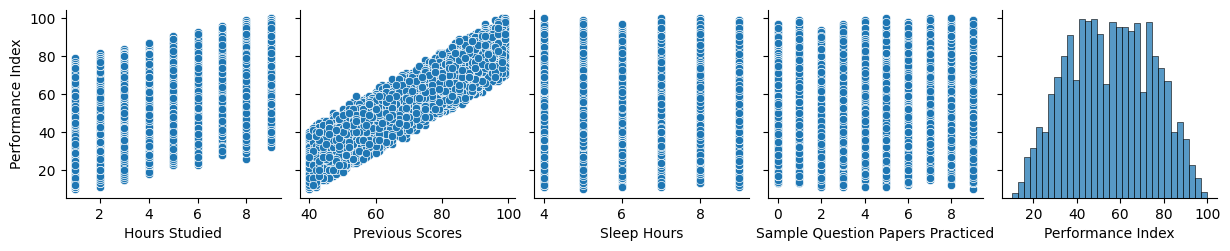

In [7]:
sns.pairplot(y_vars=["Performance Index"],data=df)
plt.show()

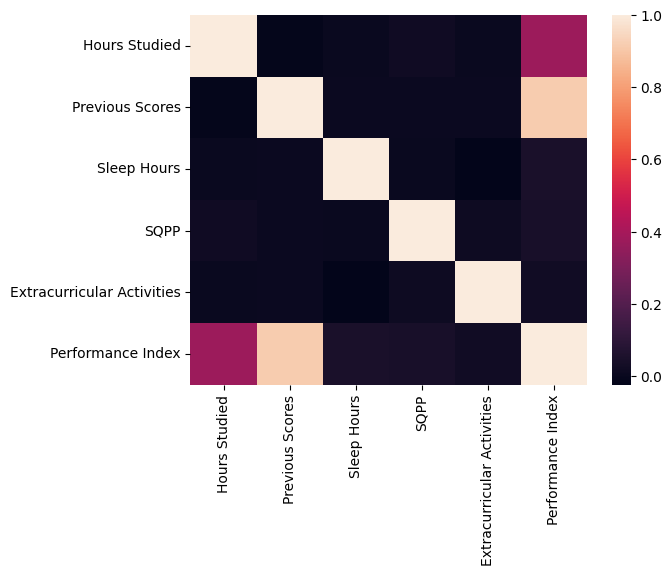

In [45]:
sns.heatmap(df.corr())
plt.show()

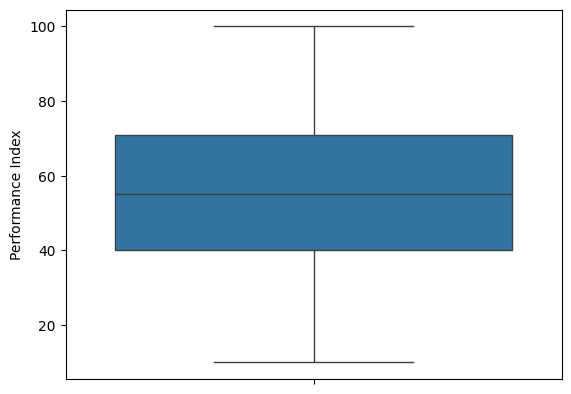

In [108]:
sns.boxplot(df["Performance Index"])
plt.show()

C:\Users\abdul\AppData\Local\Temp\ipykernel_8800\2702169931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Performance Index"])


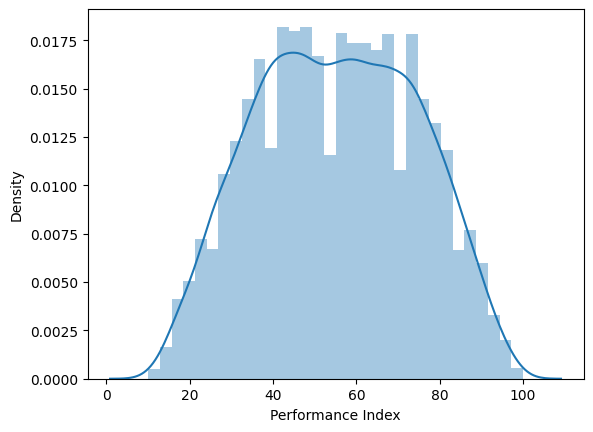

In [71]:
sns.distplot(df["Performance Index"])
plt.show()

In [53]:
%matplotlib inline

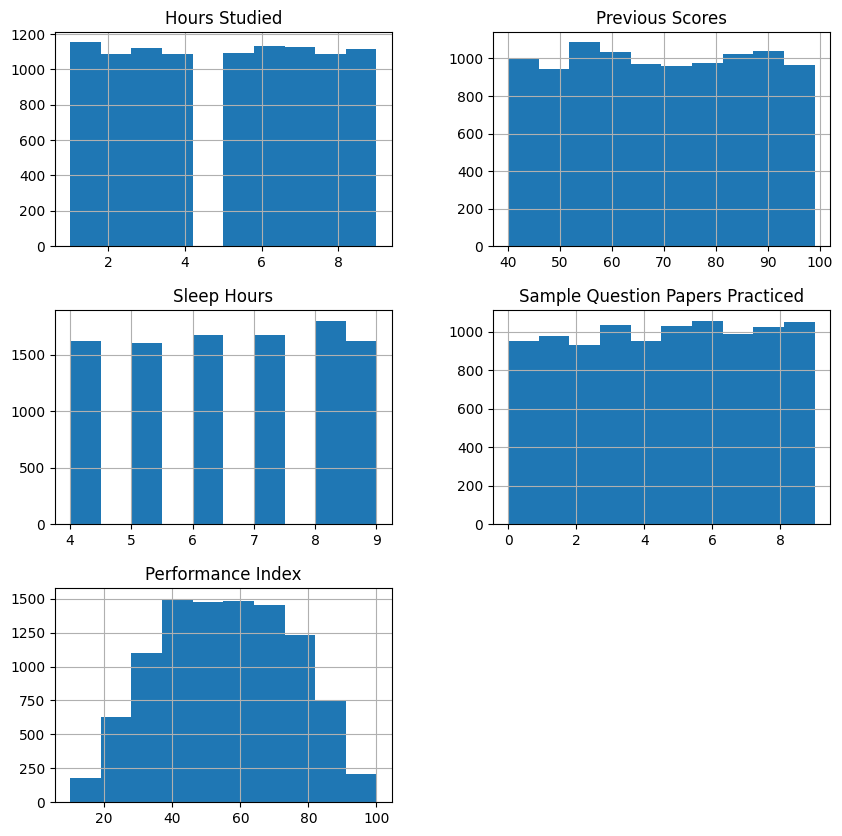

In [10]:
df.hist(figsize=(10,10))
plt.show()

In [9]:
df.shape

(10000, 6)

# Encoding

In [46]:
en_data=df[["Extracurricular Activities"]]

In [47]:
pd.get_dummies(en_data)

,Extracurricular Activities
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
9995,1.0
9996,1.0
9997,1.0
9998,1.0


In [48]:
ohe=OneHotEncoder(drop="first")
ar=ohe.fit_transform(en_data).toarray()

In [49]:
# df=df.drop("Extracurricular Activities",axis=1)

In [50]:
cd=pd.DataFrame(ar,columns=["Extracurricular Activities"])

In [51]:
df=df.join(cd)

ValueError: columns overlap but no suffix specified: Index(['Extracurricular Activities'], dtype='object')

In [38]:
new_order = ["Hours Studied","Previous Scores",	"Sleep Hours",	"SQPP","Extracurricular Activities","Performance Index"]

In [39]:
df=df[new_order]

In [18]:
df=df.rename(columns={"Sample Question Papers Practiced":"SQPP"})

# Train Model

In [44]:
df

,Hours Studied,Previous Scores,Sleep Hours,SQPP,Extracurricular Activities,Performance Index
0,7,99,9,1,1.0,91.0
1,4,82,4,2,0.0,65.0
2,8,51,7,2,1.0,45.0
3,5,52,5,2,1.0,36.0
4,7,75,8,5,0.0,66.0
...,...,...,...,...,...,...
9995,1,49,4,2,1.0,23.0
9996,7,64,8,5,1.0,58.0
9997,6,83,8,5,1.0,74.0
9998,9,97,7,0,1.0,95.0


In [40]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]



In [21]:
# index=0
# s=0
# while s <=98:
#     x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=index)
#     lr=LinearRegression()
#     lr.fit(x_train,y_train)
#     s=lr.score(x_test,y_test)*100   
#     index+=1

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
s=lr.score(x_test,y_test)*100   

In [42]:
s

98.87189383218595

# Saving Model

In [43]:
from joblib import dump

# Save the model
dump(lr, 'model.joblib')


['model.joblib']